In [2]:
pip install nltk

  Using cached nltk-3.6.7-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached regex-2022.10.31-cp36-cp36m-win_amd64.whl (279 kB)


In [82]:
#from nltk.tokenize import word_tokenize

In [83]:
#text = "Blue-Buffalo Life Protection Formula Natural Puppy Dry Dog Food"
#print(word_tokenize(text))

In [84]:
#item =["Blue Buffalo Life Protection Formula Natural Puppy Dry Dog Food","Purina Pro Plan High Protein, Digestive Health Large Breed Dry Dog Food, Chicken and Rice Formula - 34 lb. Bag"
#,"Purina ONE Natural Dry Dog Food, SmartBlend Chicken & Rice Formula - 31.1 lb. Bag"]
#words= ['Blue','Buffalo','Purina','Pro','ONE'] 

#item2 = [" ".join([w for w in t.split()]) for t in item]

#print(item2)

In [112]:
import pandas as pd
import numpy as np
df = pd.read_csv('results.csv')

In [113]:
df = pd.DataFrame(df)
df

,Description,Rating,ReviewCount,Url
0,HOLI Freeze Dried Salmon Dog Food Topper - wit...,4.3 out of 5 stars,206,https://amazon.com/sspa/click?ie=UTF8&spc=MToy...
1,Blue Buffalo Life Protection Formula Natural A...,4.7 out of 5 stars,"21,746",https://amazon.com/Blue-Buffalo-Protection-For...
2,Purina Pro Plan High Protein Dog Food With Pro...,4.7 out of 5 stars,"16,618",https://amazon.com/Purina-Pro-Plan-Shredded-Ch...
3,"Purina ONE Natural Dry Dog Food, SmartBlend La...",4.7 out of 5 stars,"13,205",https://amazon.com/Purina-Smartblend-Natural-F...
4,"Royal Canin Small Breed Adult Dry Dog Food, 14...",4.8 out of 5 stars,"9,704",https://amazon.com/Royal-Canin-Health-Nutritio...
...,...,...,...,...
645,Purina ONE SmartBlend Natural Healthy Weight F...,4.7 out of 5 stars,"13,596",https://amazon.com/Purina-Smartblend-Natural-H...
646,Wellness Complete Health Dry Dog Food with Gra...,4.6 out of 5 stars,"7,197",https://amazon.com/Wellness-Complete-Natural-F...
647,VICTOR Super Premium Dog Food – Hi-Pro Plus Dr...,4.7 out of 5 stars,"9,447",https://amazon.com/VICTOR-Super-Premium-Dog-Fo...
648,Blue Buffalo Life Protection Formula Natural S...,4.7 out of 5 stars,"8,334",https://amazon.com/Blue-Buffalo-Protection-For...


In [114]:
df['Description'] = df['Description'].str.replace("\'", "")
df['Description'] = df['Description'].str.replace("&", "")
df['Rating'] = df['Rating'].str.replace("out of 5 stars", "")
df

,Description,Rating,ReviewCount,Url
0,HOLI Freeze Dried Salmon Dog Food Topper - wit...,4.3,206,https://amazon.com/sspa/click?ie=UTF8&spc=MToy...
1,Blue Buffalo Life Protection Formula Natural A...,4.7,"21,746",https://amazon.com/Blue-Buffalo-Protection-For...
2,Purina Pro Plan High Protein Dog Food With Pro...,4.7,"16,618",https://amazon.com/Purina-Pro-Plan-Shredded-Ch...
3,"Purina ONE Natural Dry Dog Food, SmartBlend La...",4.7,"13,205",https://amazon.com/Purina-Smartblend-Natural-F...
4,"Royal Canin Small Breed Adult Dry Dog Food, 14...",4.8,"9,704",https://amazon.com/Royal-Canin-Health-Nutritio...
...,...,...,...,...
645,Purina ONE SmartBlend Natural Healthy Weight F...,4.7,"13,596",https://amazon.com/Purina-Smartblend-Natural-H...
646,Wellness Complete Health Dry Dog Food with Gra...,4.6,"7,197",https://amazon.com/Wellness-Complete-Natural-F...
647,VICTOR Super Premium Dog Food – Hi-Pro Plus Dr...,4.7,"9,447",https://amazon.com/VICTOR-Super-Premium-Dog-Fo...
648,Blue Buffalo Life Protection Formula Natural S...,4.7,"8,334",https://amazon.com/Blue-Buffalo-Protection-For...


In [115]:
from nltk.tokenize import SpaceTokenizer

In [116]:
tk = SpaceTokenizer()
br_dog = []
words= ['Blue','Buffalo','Purina','Pro','ONE','Plan','Moist','Meaty','Royal','Canin','Diet','Rachael','Ray','Nutrish','Iams']
    

In [117]:
for row in df.index:
    dog = df['Description'][row]
    
    item2 = [" ".join([w for w in tk.tokenize(dog) if w in words])]
    
    br_dog.append(item2)

In [118]:
df['Brand'] = pd.DataFrame(br_dog, columns = ['Brand'])

In [119]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [120]:
df = df.dropna()
df = df.drop(['Url','Description'], axis=1)
df

,Rating,ReviewCount,Brand
1,4.7,"21,746",Blue Buffalo
2,4.7,"16,618",Purina Pro Plan
3,4.7,"13,205",Purina ONE
4,4.8,"9,704",Royal Canin
5,4.7,"22,273",Purina ONE
...,...,...,...
643,4.7,"14,480",Purina Pro Plan
644,4.7,"5,768",Purina Pro Plan
645,4.7,"13,596",Purina ONE
648,4.7,"8,334",Blue Buffalo


In [121]:
df = df.reindex(columns=list(df.columns)[::-1])

In [122]:
df.sort_values(by='ReviewCount', ascending=True)

,Brand,ReviewCount,Rating
292,Blue Buffalo,"12,656",4.7
448,Blue Buffalo,"12,656",4.7
58,Blue Buffalo,"12,656",4.7
318,Blue Buffalo,"12,656",4.7
162,Blue Buffalo,"12,656",4.7
...,...,...,...
597,Blue Buffalo,"9,918",4.6
155,Blue Buffalo,"9,918",4.6
129,Blue Buffalo,"9,918",4.6
285,Blue Buffalo,"9,918",4.6


In [123]:
df = df.sort_values(by='Rating', ascending=False)

In [124]:
df['Brand'] = df['Brand'].str.replace("Blue Buffalo Blue", "Blue Buffalo")

In [125]:
df["Brand"].value_counts()

Blue Buffalo           150
Purina Pro Plan        150
Purina ONE             125
Rachael Ray Nutrish     50
Purina                  25
Royal Canin             25
Name: Brand, dtype: int64

In [126]:
df['Rating'] = df['Rating'].astype(float)

In [127]:
df.dtypes

Brand           object
ReviewCount     object
Rating         float64
dtype: object

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'

from IPython.core.display import HTML

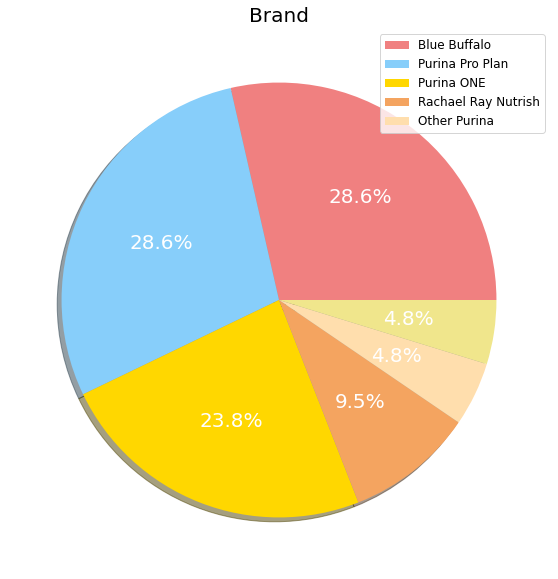

In [131]:
plt.subplots(figsize=(25, 10))
plt.pie(df.Brand.value_counts(), shadow=True, autopct='%1.1f%%', textprops={'fontsize': 20, 'color': 'white'})
plt.title('Brand', size=20)
plt.legend(['Blue Buffalo', 'Purina Pro Plan', 'Purina ONE', 'Rachael Ray Nutrish', 'Other Purina'], loc='best', fontsize=12)
plt.show()

In [146]:
cat_totals = df.groupby("Brand")["Rating"].sum().sort_values()

In [147]:
cat_totals

Brand
Purina                 117.5
Royal Canin            120.0
Rachael Ray Nutrish    232.5
Purina ONE             585.0
Blue Buffalo           702.5
Purina Pro Plan        707.5
Name: Rating, dtype: float64

<AxesSubplot:ylabel='Brand'>

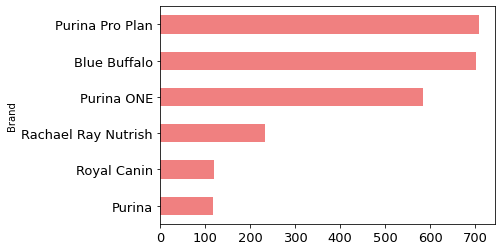

In [164]:
cat_totals.plot(kind="barh", fontsize=13)

In [152]:
cat_avgs = df.groupby("Brand")["Rating"].mean().sort_values()
cat_avgs

Brand
Rachael Ray Nutrish    4.650000
Purina ONE             4.680000
Blue Buffalo           4.683333
Purina                 4.700000
Purina Pro Plan        4.716667
Royal Canin            4.800000
Name: Rating, dtype: float64

<AxesSubplot:ylabel='Brand'>

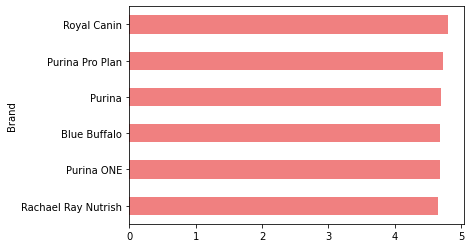

In [165]:
cat_avgs.plot(kind="barh", fontsize=10)